# Chapter 11: How to make predictions with a multiple regression model

In [1]:
import pandas as pd
import seaborn as sns

## The Cars dataset

In [2]:
carsData = pd.read_csv('cars.csv')

In [3]:
carsData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# How to create a simple regression model

<AxesSubplot:>

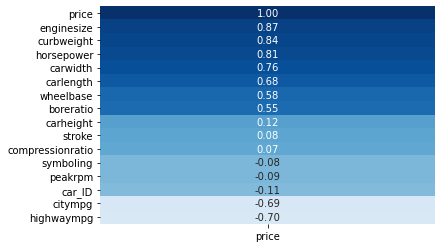

In [5]:
sns.heatmap(data=carsData.corr()[['price']].sort_values('price', ascending=False), 
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize']], carsData[['price']],
    test_size=0.20, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test,y_test)

0.7063964117029844

In [8]:
model.score(x_train, y_train)

0.766524123801206

In [9]:
y_predicted = model.predict(x_test)

In [10]:
# create DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a frame
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final[['enginesize','price','predictedPrice']].head()

,enginesize,price,predictedPrice
0,136,15250.0,14905.920686
1,90,8916.5,7164.387613
2,92,8778.0,7500.976007
3,203,31400.5,26181.631901
4,92,6488.0,7500.976007


## How to plot the residuals of a simple regression

In [11]:
final['residual'] = final.price - final.predictedPrice
final.head(2)

,predictedPrice,enginesize,price,residual
0,14905.920686,136,15250.0,344.079314
1,7164.387613,90,8916.5,1752.112387


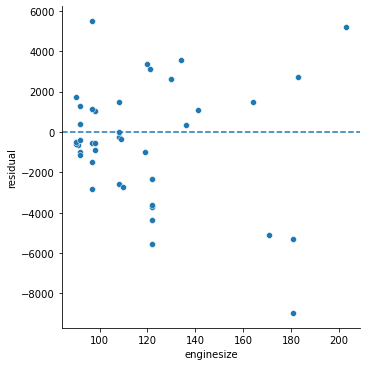

In [12]:
g = sns.relplot(data=final, x='enginesize', y='residual', kind='scatter')
for ax in g.axes.flat:
    ax.axhline(0, ls='--')

<AxesSubplot:xlabel='residual', ylabel='Density'>

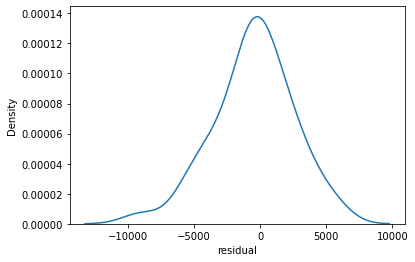

In [13]:
sns.kdeplot(data=final, x='residual')

# How to create a multiple regression model

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize','curbweight']], carsData[['price']], 
    test_size=0.20, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.7581072748679534

In [15]:
model.score(x_train, y_train)

0.7950435284247739

In [16]:
y_predicted = model.predict(x_test)

## How to prepare and plot the multiple regression

In [17]:
# create the DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a DataFrame
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final.head()[['enginesize','curbweight','price','predictedPrice']]

,enginesize,curbweight,price,predictedPrice
0,136,2507,15250.0,14186.974331
1,90,1874,8916.5,5681.243299
2,92,3110,8778.0,12256.116157
3,203,3366,31400.5,26252.387995
4,92,2015,6488.0,6633.723732


## How to plot the residuals of a multiple regression

In [18]:
final['residual'] = final.price - final.predictedPrice
final.head()

,predictedPrice,enginesize,curbweight,price,residual
0,14186.974331,136,2507,15250.0,1063.025669
1,5681.243299,90,1874,8916.5,3235.256701
2,12256.116157,92,3110,8778.0,-3478.116157
3,26252.387995,203,3366,31400.5,5148.112005
4,6633.723732,92,2015,6488.0,-145.723732


<AxesSubplot:xlabel='residual', ylabel='Density'>

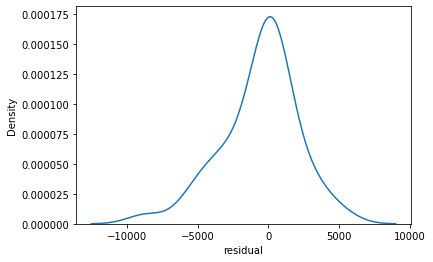

In [19]:
sns.kdeplot(data=final, x='residual')

## How to identify categorical variables

In [20]:
carsData.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

## How to review categorical variables

### Dichotomous variables

In [21]:
carsData.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [22]:
carsData.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [23]:
carsData.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [24]:
carsData.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

### Nominal variables

In [25]:
carsData.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [26]:
carsData.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [27]:
carsData.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [28]:
carsData.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [29]:
carsData.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

## How to create dummy variables

In [30]:
catColumns = ['aspiration','doornumber','carbody','drivewheel']
dummies = pd.get_dummies(carsData[catColumns])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   aspiration_std       205 non-null    uint8
 1   aspiration_turbo     205 non-null    uint8
 2   doornumber_four      205 non-null    uint8
 3   doornumber_two       205 non-null    uint8
 4   carbody_convertible  205 non-null    uint8
 5   carbody_hardtop      205 non-null    uint8
 6   carbody_hatchback    205 non-null    uint8
 7   carbody_sedan        205 non-null    uint8
 8   carbody_wagon        205 non-null    uint8
 9   drivewheel_4wd       205 non-null    uint8
 10  drivewheel_fwd       205 non-null    uint8
 11  drivewheel_rwd       205 non-null    uint8
dtypes: uint8(12)
memory usage: 2.5 KB


In [31]:
carsDummies = carsData.drop(columns=catColumns)
carsDummies = carsDummies.join(dummies)
carsDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   CarName              205 non-null    object 
 3   fueltype             205 non-null    object 
 4   enginelocation       205 non-null    object 
 5   wheelbase            205 non-null    float64
 6   carlength            205 non-null    float64
 7   carwidth             205 non-null    float64
 8   carheight            205 non-null    float64
 9   curbweight           205 non-null    int64  
 10  enginetype           205 non-null    object 
 11  cylindernumber       205 non-null    object 
 12  enginesize           205 non-null    int64  
 13  fuelsystem           205 non-null    object 
 14  boreratio            205 non-null    float64
 15  stroke               205 non-null    flo

## How to rescale the data and check the correlations

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numCols = ['wheelbase','carlength','carwidth','carheight','curbweight',
           'enginesize','boreratio','stroke','compressionratio','horsepower',
           'peakrpm','citympg','highwaympg']
carsDummies[numCols] = scaler.fit_transform(carsDummies[numCols])
carsDummies.head()

,car_ID,symboling,CarName,fueltype,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,alfa-romero giulia,gas,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,...,0,1,1,0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,gas,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,...,0,1,1,0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,gas,front,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,...,0,1,0,0,1,0,0,0,0,1
3,4,2,audi 100 ls,gas,front,0.173698,0.207256,0.136542,0.235942,-0.420797,...,1,0,0,0,0,1,0,0,1,0
4,5,2,audi 100ls,gas,front,0.107110,0.207256,0.230001,0.235942,0.516807,...,1,0,0,0,0,1,0,1,0,0


In [33]:
carsDummies.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
drivewheel_rwd,0.638957
wheelbase,0.577816
boreratio,0.553173
carbody_hardtop,0.225854


## How to create a multiple regression that includes dummy variables

In [34]:
carsTrain, carsTest = train_test_split(carsDummies, test_size=0.2, 
    random_state=20)

In [35]:
model = LinearRegression()
xCols = ['enginesize','horsepower','carwidth',
         'drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])

model.score(carsTest[xCols], carsTest['price'])

0.7523820020019687

In [36]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8334860355280258

In [37]:
y_predicted = model.predict(carsTest[xCols])

In [38]:
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

final = predicted.join([carsTest[xCols].reset_index(drop=True),
                        carsTest['price'].reset_index(drop=True)])

final[['enginesize','horsepower','carwidth','drivewheel_rwd',
       'highwaympg','price','predictedPrice']].head()

,enginesize,horsepower,carwidth,drivewheel_rwd,highwaympg,price,predictedPrice
0,0.218885,0.149133,0.183272,0,-0.837195,15250.0,13517.858822
1,-0.888455,-0.864871,-1.078431,0,1.783034,8916.5,5968.304606
2,-0.840310,-1.067671,-1.078431,0,0.181783,8778.0,4984.725918
3,1.831749,4.661448,2.987056,1,-0.400490,31400.5,37778.843127
4,-0.840310,-1.067671,-1.078431,0,1.055193,6488.0,5347.966676


## How to select the independent variables

<AxesSubplot:>

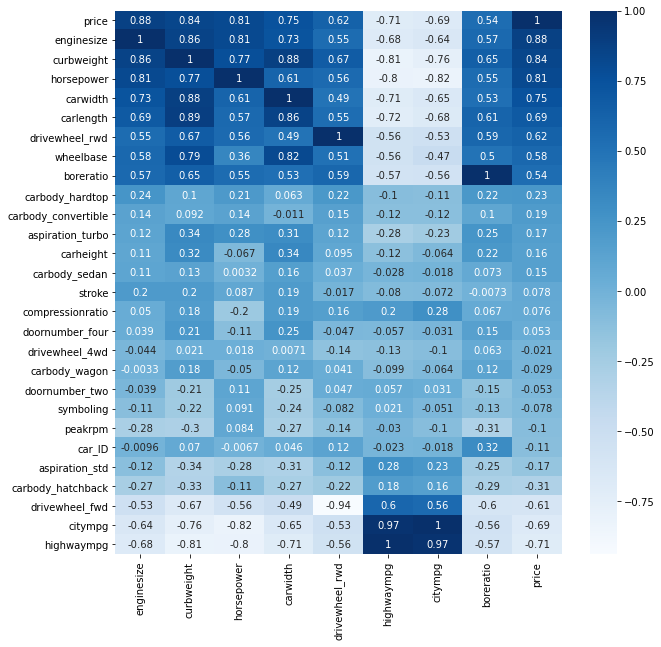

In [39]:
# use Matplotlib to set the size of the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))

# create the heatmap
sns.heatmap(carsTrain.corr()[['enginesize','curbweight','horsepower','carwidth',
                              'drivewheel_rwd','highwaympg','citympg','boreratio',
                              'price']].sort_values(by='price', ascending=False), 
            cmap='Blues', annot=True)

## How to test different combinations of variables

### An initial model that's fitted to eight independent variables

In [40]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth', 'carlength',
         'drivewheel_rwd','highwaympg','citympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.7392437314293401

In [41]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8344434015448825

### The initial model without the citympg column

In [42]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth','carlength',
         'drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.743094490364766

In [43]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8339017954221501

### A model that's fitted to all the numeric and dummy variables

In [44]:
model = LinearRegression()
xCols = carsTrain.corr().drop(columns=['price']).columns.tolist()
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.7741309452324638

In [45]:
model.score(carsTrain[xCols], carsTrain['price'])

0.893488927713899

## How to use SciKit learn to select the variables

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [56]:
carsTrain, carsTest = train_test_split(carsDummies.drop(
    columns=['CarName','fueltype','enginelocation','cylindernumber',
             'fuelsystem','enginetype']), test_size=0.2, random_state=20)

In [58]:
fs = SelectKBest(score_func=mutual_info_regression, k=20)
fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

SelectKBest(k=20,
            score_func=<function mutual_info_regression at 0x0000028072D4A700>)

In [59]:
x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
x_test_fs = fs.transform(carsTest.drop(columns=['price']))

In [60]:
model = LinearRegression()
model.fit(x_train_fs, carsTrain['price'])
model.score(x_test_fs, carsTest['price'])

0.773026891768157

In [61]:
model.score(x_train_fs, carsTrain['price'])

0.8826996202377456

In [63]:
df1 = pd.DataFrame(carsTrain.drop(columns=['price']).columns, columns=['feature'])
df2 = pd.DataFrame(fs.scores_, columns=['importance'])
importance = df1.join(df2)
importance.sort_values('importance', ascending=False).head()

,feature,importance
6,curbweight,0.903505
11,horsepower,0.873302
14,highwaympg,0.868094
7,enginesize,0.858130
13,citympg,0.731778


## How to select the right number of variables

<AxesSubplot:xlabel='numFeatures'>

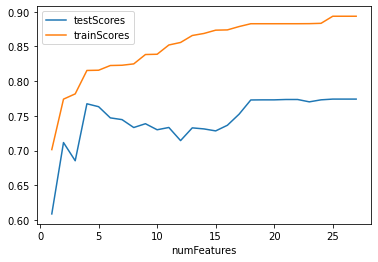

In [64]:
model = LinearRegression()
testScores = []
trainScores = []

for i in range(1, len(carsTrain.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

    x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
    x_test_fs = fs.transform(carsTest.drop(columns=['price']))

    model.fit(x_train_fs, carsTrain['price'])
    
    testScore = model.score(x_test_fs, carsTest['price'])
    trainScore = model.score(x_train_fs, carsTrain['price'])
    testScores.append(testScore)
    trainScores.append(trainScore)
    
df = pd.DataFrame(data={'testScores':testScores, 'trainScores':trainScores})
df.reset_index(inplace=True)
df.rename(columns={'index':'numFeatures'}, inplace=True)
df.numFeatures = df.numFeatures + 1
df.plot(x='numFeatures', y=['testScores','trainScores'])

<AxesSubplot:xlabel='numFeatures'>

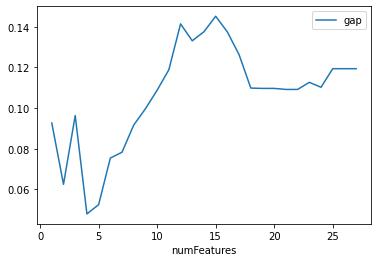

In [65]:
# Or, if you only want to plot the gap, you could do it like this...
df['gap'] = df['trainScores'] - df['testScores']
df.plot(x='numFeatures', y=['gap'])